# Montage de roues

## Définitions des données

Les mesures suivantes :

![moyeu_avt_d](https://www.sapim.be/themes/custom/sapim/images/spoke-calculator/frontwheel-with-disc-1.png  "Moyeu avant avec disque")

![Moyeu_avt_d_side](https://www.sapim.be/themes/custom/sapim/images/spoke-calculator/frontwheel-with-disc-2.png "Moyeu avant avec disque côté")

![jante_avt](https://www.sapim.be/themes/custom/sapim/images/spoke-calculator/img3.png "Jante")

![epaisseur_jante](https://www.sapim.be/themes/custom/sapim/images/spoke-calculator/img4.png "rim thickness")

- $K$ : largeur totale du moyeu avant
- $K_a$ : distance entre le disque d'ancrage des rayons et l'extrémité du moyeu (coté disque)
- $K_b$ : distance entre le disque d'ancrage des rayons et l'extrémité du moyeu (coté cassette)
- $D1_a$ : diamètre de positionnement des trous d'ancrage des rayons (coté disque)
- $D1_b$ : diamètre de positionnement des trous d'ancrage des rayons (coté cassette)
- $D_{iR}$ : diamètre interne jante (voir \ref{jante_avt})
- $n_{rayons}$ : nombre de rayons
- $n_{ca}$ : croisement tous les $n_{ca}$ rayons (coté disque)
- $n_{cb}$ : croisement tous les $n_{ca}$ rayons (coté cassette)
- $th_r$ : épaisseur de jante

On calcule donc les longeurs des rayons :
Côté disque :
$l_{ra}=D_{iR}/2-D1_a/2$

Côté cassette :
$l_{rb}=D_{iR}/2-D1_b/2$

## Laçage

On utilise [les schémas du montage de roue pas Sheldon Brown traduits par Michel Gagnon](http://mgagnon.net/velo/roue_montage.fr.php) pour le montage

![roue_rayonnee](http://mgagnon.net/velo/images-tech/roue_montage36.gif) 

Pour prendre en compte la largeur du moyeu
On va définir une position en z telle que :

- sur la jante, z=0
- sur le flasque côté disque, z=-ec_a
- sur le flasque côté cassette, z=ec_b

## Vérification des longeurs de rayons

On utilise le [calculateur de rayon de DT Swiss](https://spokes-calculator.dtswiss.com/fr/calculator) et on obtient avec des rayons DT Aerolite et 3 croisements

- roue avant :
 - côté disque (gauche) = 267 mm
 - côté cassette (droite) = 270 mm
- roue arrière
 - côté disque (gauche) = 264 mm
 - côté cassette (droite) = 263 mm


# Gravel Agathe
## Roue avant Gravel Agathe

Modèle de jantes : winow 300
Modèle de moyeux : Novatec D791SB (avant, 28 trous) & D792SB (arrière, 28 trous)

In [1]:
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
#!pip install os

# Common imports
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
import os

from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke

In [2]:
K=100
K_a=26.7
K_b=14.8
D1_a=58
D1_b=45
D_iR=574
n_r=28
n_ca=3
n_cb=3
th_r=1.8

d_ff=K-K_a-K_b
ec_a=K/2-K_a
ec_b=K/2-K_b
d_tr=2.6


tmp_lra=np.sqrt((D_iR/2)**2+(D1_a/2)**2-D_iR*(D1_a/2)*np.cos(n_ca*4*np.pi/n_r))
l_ra=np.sqrt(ec_a**2+tmp_lra**2)-d_tr/2+th_r
print('Longueur des rayons de roue avant côté disque = %.2f mm' %l_ra)
tmp_lrb=np.sqrt((D_iR/2)**2+(D1_b/2)**2-D_iR*(D1_b/2)*np.cos(n_cb*4*np.pi/n_r))
l_rb=np.sqrt(ec_b**2+tmp_lrb**2)-d_tr/2+th_r
print('Longueur des rayons de roue avant côté casssette = %.2f mm' %l_rb)

Longueur des rayons de roue avant côté disque = 283.43 mm
Longueur des rayons de roue avant côté casssette = 285.53 mm


largeur du moyeu côté disque : 23.30
largeur du moyeu côté disque : 35.20
longueur des rayons de queue côté cassette : 275 mm
longueur des rayons de queue côté disque : 270 mm
longueur des rayons de tête côté cassette : 275 mm
longueur des rayons de tête côté disque : 270 mm


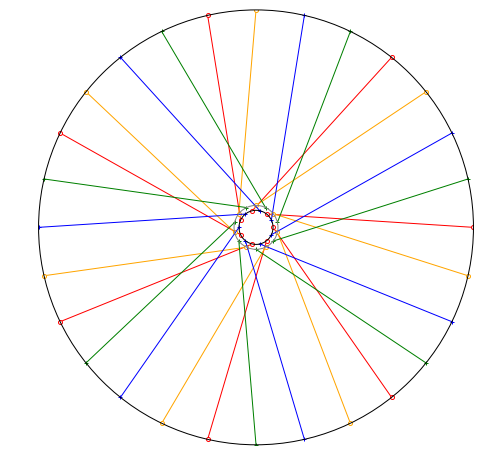

In [3]:
D_iR=574

# 28 trous
n_r=28

K=100
K_a=26.7
K_b=14.8
D1_a=58
D1_b=45

n_ca=2
n_cb=2

d_ff=K-K_a-K_b
ec_a=K/2-K_a
print('largeur du moyeu côté disque : %.2f' %ec_a)
ec_b=K/2-K_b
print('largeur du moyeu côté disque : %.2f' %ec_b)
d_tr=2.6

radius=D_iR/2/1000

# Sur la jante
theta=np.arange(n_r)*2*np.pi/n_r
x =radius*np.cos(theta)
y =radius*np.sin(theta)

# Sur le moyeu côté cassette
r_ib=D1_b/2/1000
theta_ib=(np.arange(int(n_r/2)))*2*np.pi/(n_r/2)-2*(4-n_cb)*(2*np.pi/(n_r/2))/2
x_ib =r_ib*np.cos(theta_ib)
y_ib =r_ib*np.sin(theta_ib)

# Sur le moyeux coté disque
r_ia=D1_a/2/1000
theta_ia=theta_ib+(2*np.pi/(n_r/2))/2
x_ia =r_ia*np.cos(theta_ia)
y_ia =r_ia*np.sin(theta_ia)

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

# Jante
circle = Circle((0, 0), radius, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté cassette
circle = Circle((0, 0), r_ib, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté disque
circle = Circle((0, 0), r_ia, clip_on=False, zorder=10, linewidth=1,edgecolor='gray', facecolor='None')
ax.add_artist(circle)


imax=int(n_r/4)
#Placage des rayons de queue côté cassette
#imax=3
for i in np.arange(imax) :
    i_j=(i*4)%len(x) #index du trou sur la jante
    i_f=(i*2+4)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='red', markerfacecolor='w',markeredgecolor='r',markersize=4)
print('longueur des rayons de queue côté cassette : %i mm' %l_rbq)


# placage des rayons de queue côté disque
#imax=int(n_r/4)
for i in np.arange(imax) :
    i_j=(i*4-1)%len(x) #index du trou sur la jante
    i_f=(i*2+3)%len(x_ia) # index du trou sur le flasque
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_raq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='orange', markerfacecolor='w',markeredgecolor='orange',markersize=4)
print('longueur des rayons de queue côté disque : %i mm' %l_raq)

#Placage des rayons de tête côté cassette
#imax=1
for i in np.arange(imax) :
    i_j=(2*(2*(i+n_cb)-5))%len(x) #index du trou sur la jante en prenant en compte le nombre de croisement
    i_f=(i*2-1)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbt=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='blue', markerfacecolor='w',markeredgecolor='b',markersize=4)
print('longueur des rayons de tête côté cassette : %i mm' %l_rbt)

#Placage des rayons de tête côté disque
#imax=3
for i in np.arange(imax) :
    i_j=((i+(n_cb-3))*4+1)%len(x)
    i_f=(i*2-2)%len(x_ia)
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rat=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='green', markerfacecolor='w',markeredgecolor='green',markersize=4)
print('longueur des rayons de tête côté disque : %i mm' %l_rat)


ax.set_axis_off()
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
plt.show()

### Mesures roues arrière Gravel Agathe

In [4]:
K=142
K_a=35.4
K_b=53.4
D1_a=58
D1_b=49
D_iR=574
n_r=28
n_ca=3
n_cb=3
th_r=1.8

d_ff=K-K_a-K_b
ec_a=K/2-K_a
ec_b=K/2-K_b
d_tr=2.6


tmp_lra=np.sqrt((D_iR/2)**2+(D1_a/2)**2-D_iR*(D1_a/2)*np.cos(n_ca*4*np.pi/n_r))
l_ra=np.sqrt(ec_a**2+tmp_lra**2)-d_tr/2+th_r
print('Longueur des rayons de roue arrière côté disque = %.2f mm' %l_ra)
tmp_lrb=np.sqrt((D_iR/2)**2+(D1_b/2)**2-D_iR*(D1_b/2)*np.cos(n_cb*4*np.pi/n_r))
l_rb=np.sqrt(ec_b**2+tmp_lrb**2)-d_tr/2+th_r
print('Longueur des rayons de roue arrière côté casssette = %.2f mm' %l_rb)

Longueur des rayons de roue arrière côté disque = 284.71 mm
Longueur des rayons de roue arrière côté casssette = 283.61 mm


largeur du moyeu côté disque : 35.60
largeur du moyeu côté disque : 17.60
longueur des rayons de queue côté cassette : 272 mm
longueur des rayons de queue côté disque : 272 mm
longueur des rayons de tête côté cassette : 272 mm
longueur des rayons de tête côté disque : 272 mm


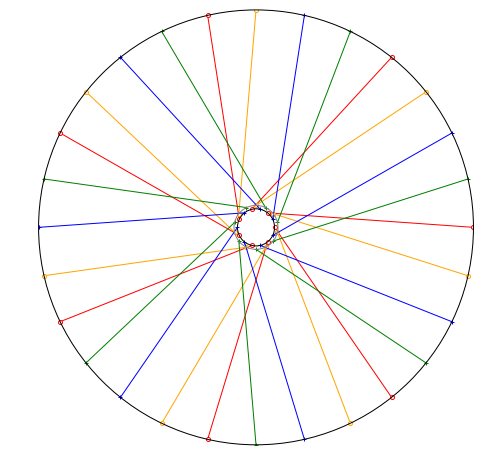

In [5]:
D_iR=574

# 28 trous
n_r=28

K=142
K_a=35.4
K_b=53.4
D1_a=58
D1_b=49

n_ca=2
n_cb=2

d_ff=K-K_a-K_b
ec_a=K/2-K_a
print('largeur du moyeu côté disque : %.2f' %ec_a)
ec_b=K/2-K_b
print('largeur du moyeu côté disque : %.2f' %ec_b)
d_tr=2.6

radius=D_iR/2/1000

# Sur la jante
theta=np.arange(n_r)*2*np.pi/n_r
x =radius*np.cos(theta)
y =radius*np.sin(theta)

# Sur le moyeu côté cassette
r_ib=D1_b/2/1000
theta_ib=(np.arange(int(n_r/2)))*2*np.pi/(n_r/2)-2*(4-n_cb)*(2*np.pi/(n_r/2))/2
x_ib =r_ib*np.cos(theta_ib)
y_ib =r_ib*np.sin(theta_ib)

# Sur le moyeux coté disque
r_ia=D1_a/2/1000
theta_ia=theta_ib+(2*np.pi/(n_r/2))/2
x_ia =r_ia*np.cos(theta_ia)
y_ia =r_ia*np.sin(theta_ia)

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

# Jante
circle = Circle((0, 0), radius, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté cassette
circle = Circle((0, 0), r_ib, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté disque
circle = Circle((0, 0), r_ia, clip_on=False, zorder=10, linewidth=1,edgecolor='gray', facecolor='None')
ax.add_artist(circle)


imax=int(n_r/4)
#Placage des rayons de queue côté cassette
#imax=3
for i in np.arange(imax) :
    i_j=(i*4)%len(x) #index du trou sur la jante
    i_f=(i*2+4)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='red', markerfacecolor='w',markeredgecolor='r',markersize=4)
print('longueur des rayons de queue côté cassette : %i mm' %l_rbq)


# placage des rayons de queue côté disque
#imax=int(n_r/4)
for i in np.arange(imax) :
    i_j=(i*4-1)%len(x) #index du trou sur la jante
    i_f=(i*2+3)%len(x_ia) # index du trou sur le flasque
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_raq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='orange', markerfacecolor='w',markeredgecolor='orange',markersize=4)
print('longueur des rayons de queue côté disque : %i mm' %l_raq)

#Placage des rayons de tête côté cassette
#imax=1
for i in np.arange(imax) :
    i_j=(2*(2*(i+n_cb)-5))%len(x) #index du trou sur la jante en prenant en compte le nombre de croisement
    i_f=(i*2-1)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbt=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='blue', markerfacecolor='w',markeredgecolor='b',markersize=4)
print('longueur des rayons de tête côté cassette : %i mm' %l_rbt)

#Placage des rayons de tête côté disque
#imax=3
for i in np.arange(imax) :
    i_j=((i+(n_cb-3))*4+1)%len(x)
    i_f=(i*2-2)%len(x_ia)
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rat=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='green', markerfacecolor='w',markeredgecolor='green',markersize=4)
print('longueur des rayons de tête côté disque : %i mm' %l_rat)


ax.set_axis_off()
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
plt.show()

idée pour la suite : faire un gif avec les images générées par les boucles for ci après [idee](http://www.xavierdupre.fr/blog/2013-05-25_nojs.html)

# VTT 27.5 Agathe

Modèle de jantes : winow 650
Modèle de moyeux : Novatec D791SB (avant, 28 trous) & D792SB (arrière, 32 trous)

Disponibilité des rayons : 30 rayons de 258 mm + 30 rayon de 261 mm, \#mercilachine !

**Mesures jantes :**

In [6]:
D_iR=545
th_r=1.8

# Roue Avant 27.5 VTT Agathe

In [7]:
# 28 trous
n_r=28

K=100
K_a=26.7
K_b=14.8
D1_a=58
D1_b=45

n_ca=2
n_cb=2

d_ff=K-K_a-K_b
ec_a=K/2-K_a
print('largeur du moyeu côté disque : %.2f' %ec_a)
ec_b=K/2-K_b
print('largeur du moyeu côté disque : %.2f' %ec_b)
d_tr=2.6

radius=D_iR/2/1000

largeur du moyeu côté disque : 23.30
largeur du moyeu côté disque : 35.20


longueur des rayons de queue côté cassette : 261 mm
longueur des rayons de queue côté disque : 256 mm
longueur des rayons de tête côté cassette : 261 mm
longueur des rayons de tête côté disque : 256 mm


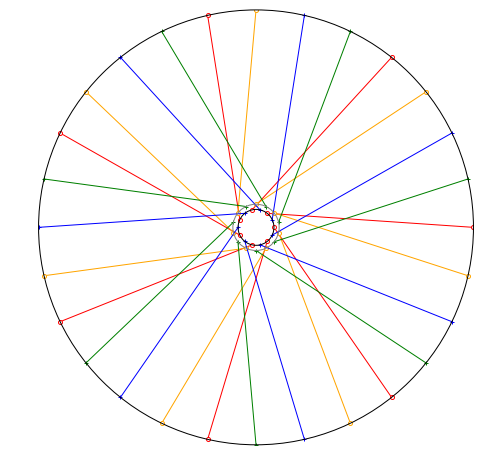

In [8]:
# Sur la jante
theta=np.arange(n_r)*2*np.pi/n_r
x =radius*np.cos(theta)
y =radius*np.sin(theta)

# Sur le moyeu côté cassette
r_ib=D1_b/2/1000
theta_ib=(np.arange(int(n_r/2)))*2*np.pi/(n_r/2)-2*(4-n_cb)*(2*np.pi/(n_r/2))/2
x_ib =r_ib*np.cos(theta_ib)
y_ib =r_ib*np.sin(theta_ib)

# Sur le moyeux coté disque
r_ia=D1_a/2/1000
theta_ia=theta_ib+(2*np.pi/(n_r/2))/2
x_ia =r_ia*np.cos(theta_ia)
y_ia =r_ia*np.sin(theta_ia)

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

# Jante
circle = Circle((0, 0), radius, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté cassette
circle = Circle((0, 0), r_ib, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté disque
circle = Circle((0, 0), r_ia, clip_on=False, zorder=10, linewidth=1,edgecolor='gray', facecolor='None')
ax.add_artist(circle)


imax=int(n_r/4)
#Placage des rayons de queue côté cassette
#imax=3
for i in np.arange(imax) :
    i_j=(i*4)%len(x) #index du trou sur la jante
    i_f=(i*2+4)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='red', markerfacecolor='w',markeredgecolor='r',markersize=4)
print('longueur des rayons de queue côté cassette : %i mm' %l_rbq)


# placage des rayons de queue côté disque
#imax=int(n_r/4)
for i in np.arange(imax) :
    i_j=(i*4-1)%len(x) #index du trou sur la jante
    i_f=(i*2+3)%len(x_ia) # index du trou sur le flasque
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_raq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='orange', markerfacecolor='w',markeredgecolor='orange',markersize=4)
print('longueur des rayons de queue côté disque : %i mm' %l_raq)

#Placage des rayons de tête côté cassette
#imax=1
for i in np.arange(imax) :
    i_j=(2*(2*(i+n_cb)-5))%len(x) #index du trou sur la jante en prenant en compte le nombre de croisement
    i_f=(i*2-1)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbt=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='blue', markerfacecolor='w',markeredgecolor='b',markersize=4)
print('longueur des rayons de tête côté cassette : %i mm' %l_rbt)

#Placage des rayons de tête côté disque
#imax=3
for i in np.arange(imax) :
    i_j=((i+(n_cb-3))*4+1)%len(x)
    i_f=(i*2-2)%len(x_ia)
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rat=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='green', markerfacecolor='w',markeredgecolor='green',markersize=4)
print('longueur des rayons de tête côté disque : %i mm' %l_rat)


ax.set_axis_off()
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
plt.show()

Cette configuration semble fonctionner, en particulier avec les rayons fournis.
Le [Calculateur de rayons DT Swiss](https://spokes-calculator.dtswiss.com/fr/calculator) donne également :

- côté cassette : 260 mm
- côté disque : 255 mm

### Un zoom

Zoom de la figure précédente


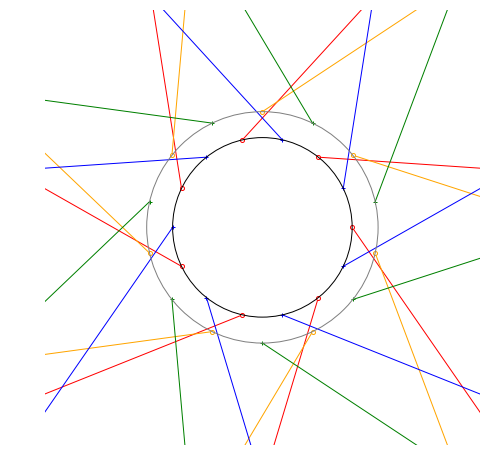

In [9]:
print('Zoom de la figure précédente')

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

# Jante
circle = Circle((0, 0), radius, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
#ax.add_artist(circle)

# Flasque côté cassette
circle = Circle((0, 0), r_ib, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté disque
circle = Circle((0, 0), r_ia, clip_on=False, zorder=10, linewidth=1,edgecolor='gray', facecolor='None')
ax.add_artist(circle)


imax=int(n_r/4)
#Placage des rayons de queue côté cassette
#imax=3
for i in np.arange(imax) :
    i_j=(i*4)%len(x) #index du trou sur la jante
    i_f=(i*2+4)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='red', markerfacecolor='w',markeredgecolor='r',markersize=4)
#print('longueur des rayons de queue côté cassette : %i mm' %l_rbq)


# placage des rayons de queue côté disque
#imax=int(n_r/4)
for i in np.arange(imax) :
    i_j=(i*4-1)%len(x) #index du trou sur la jante
    i_f=(i*2+3)%len(x_ia) # index du trou sur le flasque
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_raq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='orange', markerfacecolor='w',markeredgecolor='orange',markersize=4)
#print('longueur des rayons de queue côté disque : %i mm' %l_raq)

#Placage des rayons de tête côté cassette
#imax=1
for i in np.arange(imax) :
    i_j=(2*(2*(i+n_cb)-5))%len(x) #index du trou sur la jante en prenant en compte le nombre de croisement
    i_f=(i*2-1)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbt=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='blue', markerfacecolor='w',markeredgecolor='b',markersize=4)
#print('longueur des rayons de tête côté cassette : %i mm' %l_rbt)

#Placage des rayons de tête côté disque
#imax=3
for i in np.arange(imax) :
    i_j=((i+(n_cb-3))*4+1)%len(x)
    i_f=(i*2-2)%len(x_ia)
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rat=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='green', markerfacecolor='w',markeredgecolor='green',markersize=4)
#print('longueur des rayons de tête côté disque : %i mm' %l_rat)


ax.set_axis_off()
ax.margins(x=-0.4,y=-0.4)
#ax.set_xlim(-radius, radius)
#ax.set_ylim(-radius, radius)
plt.show()

## Test 3 croisements 

largeur du moyeu côté disque : 23.30
largeur du moyeu côté disque : 35.20
longueur des rayons de queue côté cassette : 270 mm
longueur des rayons de queue côté disque : 268 mm
longueur des rayons de tête côté cassette : 270 mm
longueur des rayons de tête côté disque : 268 mm


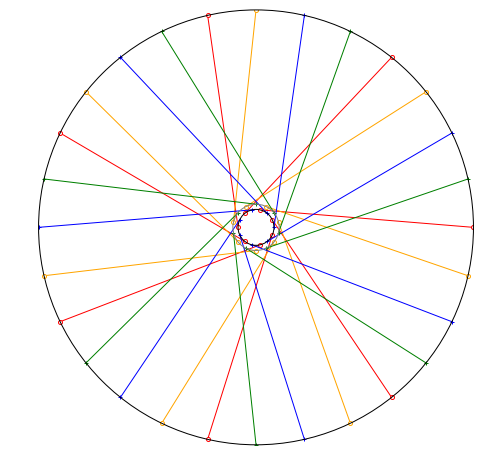

In [10]:
# 28 trous
n_r=28

K=100
K_a=26.7
K_b=14.8
D1_a=58
D1_b=45

n_ca=3
n_cb=3

d_ff=K-K_a-K_b
ec_a=K/2-K_a
print('largeur du moyeu côté disque : %.2f' %ec_a)
ec_b=K/2-K_b
print('largeur du moyeu côté disque : %.2f' %ec_b)
d_tr=2.6

radius=D_iR/2/1000

# Sur la jante
theta=np.arange(n_r)*2*np.pi/n_r
x =radius*np.cos(theta)
y =radius*np.sin(theta)

# Sur le moyeu côté cassette
r_ib=D1_b/2/1000
theta_ib=(np.arange(int(n_r/2)))*2*np.pi/(n_r/2)-2*(4-n_cb)*(2*np.pi/(n_r/2))/2
x_ib =r_ib*np.cos(theta_ib)
y_ib =r_ib*np.sin(theta_ib)

# Sur le moyeux coté disque
r_ia=D1_a/2/1000
theta_ia=theta_ib+(2*np.pi/(n_r/2))/2
x_ia =r_ia*np.cos(theta_ia)
y_ia =r_ia*np.sin(theta_ia)

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

# Jante
circle = Circle((0, 0), radius, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté cassette
circle = Circle((0, 0), r_ib, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté disque
circle = Circle((0, 0), r_ia, clip_on=False, zorder=10, linewidth=1,edgecolor='gray', facecolor='None')
ax.add_artist(circle)


imax=int(n_r/4)
#Placage des rayons de queue côté cassette
#imax=3
for i in np.arange(imax) :
    i_j=(i*4)%len(x) #index du trou sur la jante
    i_f=(i*2+4)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='red', markerfacecolor='w',markeredgecolor='r',markersize=4)
print('longueur des rayons de queue côté cassette : %i mm' %l_rbq)


# placage des rayons de queue côté disque
#imax=int(n_r/4)
for i in np.arange(imax) :
    i_j=(i*4-1)%len(x) #index du trou sur la jante
    i_f=(i*2+3)%len(x_ia) # index du trou sur le flasque
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_raq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='orange', markerfacecolor='w',markeredgecolor='orange',markersize=4)
print('longueur des rayons de queue côté disque : %i mm' %l_raq)

#Placage des rayons de tête côté cassette
#imax=1
for i in np.arange(imax) :
    i_j=(2*(2*(i+n_cb)-5))%len(x) #index du trou sur la jante en prenant en compte le nombre de croisement
    i_f=(i*2-1)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbt=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='blue', markerfacecolor='w',markeredgecolor='b',markersize=4)
print('longueur des rayons de tête côté cassette : %i mm' %l_rbt)

#Placage des rayons de tête côté disque
#imax=3
for i in np.arange(imax) :
    i_j=((i+(n_cb-3))*4+1)%len(x)
    i_f=(i*2-2)%len(x_ia)
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rat=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='green', markerfacecolor='w',markeredgecolor='green',markersize=4)
print('longueur des rayons de tête côté disque : %i mm' %l_rat)


ax.set_axis_off()
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
plt.show()

On retrouve les mêmes longeurs suggérées par le [Calculateur de rayons DT Swiss](https://spokes-calculator.dtswiss.com/fr/calculator).

# Roue arrière VTT 27.5 Agathe

In [11]:
# 32 trous
n_r=32

K=142
K_a=35.4
K_b=53.4
D1_a=58
D1_b=49

n_ca=2
n_cb=2

d_ff=K-K_a-K_b
ec_a=K/2-K_a
print('largeur du moyeu côté disque : %.2f' %ec_a)
ec_b=K/2-K_b
print('largeur du moyeu côté disque : %.2f' %ec_b)
d_tr=2.6

radius=D_iR/2/1000

largeur du moyeu côté disque : 35.60
largeur du moyeu côté disque : 17.60


longueur des rayons de queue côté cassette : 256 mm
longueur des rayons de queue côté disque : 255 mm
longueur des rayons de tête côté cassette : 256 mm
longueur des rayons de tête côté disque : 255 mm


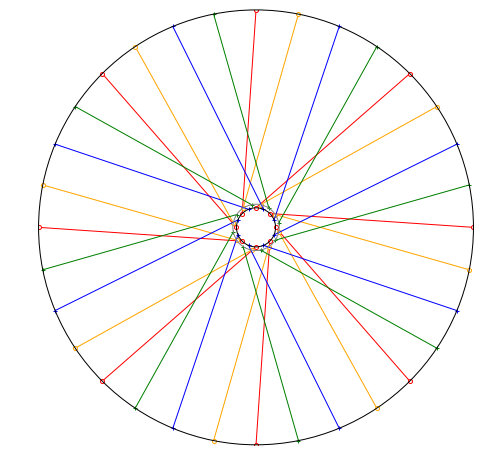

In [12]:
# Sur la jante
theta=np.arange(n_r)*2*np.pi/n_r
x =radius*np.cos(theta)
y =radius*np.sin(theta)

# Sur le moyeu côté cassette
r_ib=D1_b/2/1000
theta_ib=(np.arange(int(n_r/2)))*2*np.pi/(n_r/2)-2*(4-n_cb)*(2*np.pi/(n_r/2))/2
x_ib =r_ib*np.cos(theta_ib)
y_ib =r_ib*np.sin(theta_ib)

# Sur le moyeux coté disque
r_ia=D1_a/2/1000
theta_ia=theta_ib+(2*np.pi/(n_r/2))/2
x_ia =r_ia*np.cos(theta_ia)
y_ia =r_ia*np.sin(theta_ia)

#fig, ax = plt.subplots()
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1, aspect=1)

# Jante
circle = Circle((0, 0), radius, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté cassette
circle = Circle((0, 0), r_ib, clip_on=False, zorder=10, linewidth=1,edgecolor='black', facecolor='None')
ax.add_artist(circle)

# Flasque côté disque
circle = Circle((0, 0), r_ia, clip_on=False, zorder=10, linewidth=1,edgecolor='gray', facecolor='None')
ax.add_artist(circle)


imax=int(n_r/4)
#Placage des rayons de queue côté cassette
#imax=3
for i in np.arange(imax) :
    i_j=(i*4)%len(x) #index du trou sur la jante
    i_f=(i*2+4)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='red', markerfacecolor='w',markeredgecolor='r',markersize=4)
print('longueur des rayons de queue côté cassette : %i mm' %l_rbq)


# placage des rayons de queue côté disque
#imax=int(n_r/4)
for i in np.arange(imax) :
    i_j=(i*4-1)%len(x) #index du trou sur la jante
    i_f=(i*2+3)%len(x_ia) # index du trou sur le flasque
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_raq=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='o',color='orange', markerfacecolor='w',markeredgecolor='orange',markersize=4)
print('longueur des rayons de queue côté disque : %i mm' %l_raq)

#Placage des rayons de tête côté cassette
#imax=1
for i in np.arange(imax) :
    i_j=(2*(2*(i+n_cb)-5))%len(x) #index du trou sur la jante en prenant en compte le nombre de croisement
    i_f=(i*2-1)%len(x_ib) # index du trou sur le flasque
    x_r=[x[i_j],x_ib[i_f]]
    y_r=[y[i_j],y_ib[i_f]]
    z_r=[0,ec_b/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rbt=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='blue', markerfacecolor='w',markeredgecolor='b',markersize=4)
print('longueur des rayons de tête côté cassette : %i mm' %l_rbt)

#Placage des rayons de tête côté disque
#imax=3
for i in np.arange(imax) :
    i_j=((i+(n_cb-3))*4+1)%len(x)
    i_f=(i*2-2)%len(x_ia)
    x_r=[x[i_j],x_ia[i_f]]
    y_r=[y[i_j],y_ia[i_f]]
    z_r=[0,ec_a/1000]
    vec_r=[x_r[1]-x_r[0],y_r[1]-y_r[0],z_r[1]-z_r[0]]
    l_rat=np.linalg.norm(vec_r)*1000
    ax.plot(x_r,y_r,linewidth=1,marker='+',color='green', markerfacecolor='w',markeredgecolor='green',markersize=4)
print('longueur des rayons de tête côté disque : %i mm' %l_rat)


ax.set_axis_off()
ax.set_xlim(-radius, radius)
ax.set_ylim(-radius, radius)
plt.show()

On retrouve bien les résultats du [Calculateur de rayons DT Swiss](https://spokes-calculator.dtswiss.com/fr/calculator).

# Bilan Roues VTT 27.5

On a monté les deux roues avec 2 croisements de chaque côté et on a utilisé les rayons de 258 mm côté disque et les rayons de 261 mm côté cassette.

La roue arrière a été montée sans problème

Beaucoup de difficultées à monter les rayons de tête côté cassette, surtout avec les écrous de rayons double squar : changement pour des écrous de rayons classiques pour lesquels le filetage commence plus tôt